In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

## Ans 5

In [2]:
M = [[-2872.0, 1744.3, -138.7, 77270.0],
    [-273.9, -174.8, -3287.5, 94116.0],
    [-0.7380, -0.6480, -0.1883, 75.633]]
M

[[-2872.0, 1744.3, -138.7, 77270.0],
 [-273.9, -174.8, -3287.5, 94116.0],
 [-0.738, -0.648, -0.1883, 75.633]]

In [3]:
H = [[-2872.0, 1744.3, -138.7],
    [-273.9, -174.8, -3287.5],
    [-0.7380, -0.6480, -0.1883]]
H

[[-2872.0, 1744.3, -138.7],
 [-273.9, -174.8, -3287.5],
 [-0.738, -0.648, -0.1883]]

In [4]:
h = [[77270.0],
    [94116.0],
    [-0.1883]]
h

[[77270.0], [94116.0], [-0.1883]]

In [5]:
Rt, Kinv  = np.linalg.qr(H)
print("K=", Kinv)
print("R", Rt)

K= [[ 2885.03132646 -1719.82583214   450.18325349]
 [    0.           339.61309899  3259.46644535]
 [    0.             0.            10.36848054]]
R [[-9.95483125e-01  9.49386423e-02  4.94846659e-05]
 [-9.49383105e-02 -9.95477972e-01 -3.21327546e-03]
 [-2.55803115e-04 -3.20345949e-03  9.99994836e-01]]


In [6]:
R = Rt.T
R

array([[-9.95483125e-01, -9.49383105e-02, -2.55803115e-04],
       [ 9.49386423e-02, -9.95477972e-01, -3.20345949e-03],
       [ 4.94846659e-05, -3.21327546e-03,  9.99994836e-01]])

In [46]:
K = np.linalg.inv(Kinv)
K=K/K[2][2]
K

array([[ 3.59388837e-03,  1.81997163e-02, -5.87735810e+00],
       [ 0.00000000e+00,  3.05302727e-02, -9.59758753e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [47]:
t = np.matmul(K, h)
t

array([[ 1.99169096e+03],
       [ 2.87519437e+03],
       [-1.88300000e-01]])

## Part 2 programming
## Ans 1

In [35]:
N = 501
x2 = np.arange(-(N-1)/2, (N+1)/2, 1)
x1 = -x2

x, y = np.meshgrid(x1, x2, indexing = 'xy')
r = np.sqrt(x**2,y**2)

km = 0.7*math.pi
rm = x2
w = rm/10
term1 = np.sin((km*(np.matmul(r,r))/(2*rm)))
term2 = 0.5*np.tanh((rm - r)/w) + 0.5
g = np.matmul(term1, term2)
I = (g + 1)/2

C:\Users\SHRADDHA\AppData\Local\Temp/ipykernel_7632/1411951099.py:11: RuntimeWarning: invalid value encountered in true_divide
  term1 = np.sin((km*(np.matmul(r,r))/(2*rm)))
C:\Users\SHRADDHA\AppData\Local\Temp/ipykernel_7632/1411951099.py:12: RuntimeWarning: invalid value encountered in true_divide
  term2 = 0.5*np.tanh((rm - r)/w) + 0.5


I run the codes on matlab and produce the image and using it

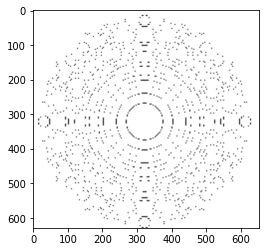

In [36]:
I = cv2.imread("q1.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I, cmap = 'gray')

In [37]:
I.shape

(629, 653)

In [38]:
I = np.uint8(I*255)

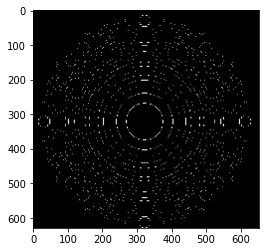

In [39]:
ret, I = cv2.threshold(I,127,255,cv2.THRESH_BINARY)
plt.imshow(I,cmap = 'gray')

In [40]:
I_cropped = I[125:375, 125:375]
I_cropped.shape

(250, 250)

Text(0.5, 1.0, 'Cropped Image')

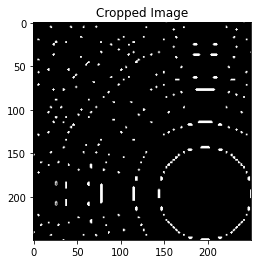

In [41]:
plt.imshow(I_cropped,cmap = 'gray')
plt.title("Cropped Image")

Text(0.5, 1.0, 'Lowpass filter')

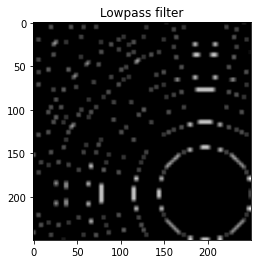

In [42]:
kernel = np.ones((5,5), np.float32)/25
smooth = cv2.filter2D(I_cropped, -1, kernel)
plt.imshow(smooth,cmap = 'gray')
plt.title("Lowpass filter")

Text(0.5, 1.0, 'Laplacian')

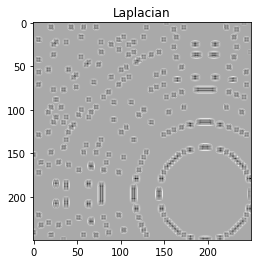

In [43]:
laplacian = cv2.Laplacian(smooth,cv2.CV_64F)
plt.imshow(laplacian,cmap = 'gray')
plt.title("Laplacian")

Text(0.5, 1.0, 'LoG')

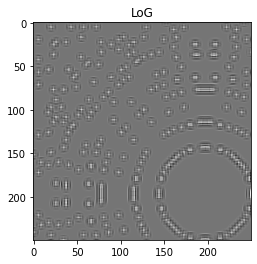

In [44]:
gaussian = cv2.GaussianBlur(laplacian, (5,5), 3, cv2.BORDER_DEFAULT)       #LoG operator
log = cv2.Laplacian(gaussian, cv2.CV_64F, 5) 
plt.imshow(log,cmap = 'gray')
plt.title("LoG")

In [45]:
ret, thresh1 = cv2.threshold(laplacian, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh1, cmap = 'gray')
plt.title("otsu Threshold")

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 6 (CV_64FC1)


## Ans 2

Text(0.5, 1.0, 'Grayscale Image')

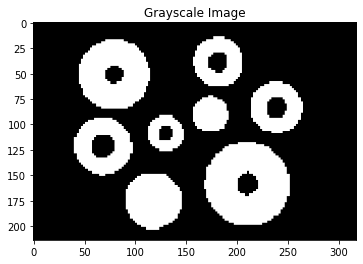

In [21]:
fig2 = cv2.imread("Fig1.png")
fig2 = cv2.cvtColor(fig2, cv2.COLOR_BGR2GRAY)
plt.imshow(fig2, cmap = 'gray')
plt.title("Grayscale Image")

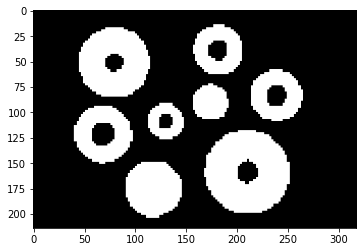

In [22]:
ret, thresh1 = cv2.threshold(fig2, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')

True

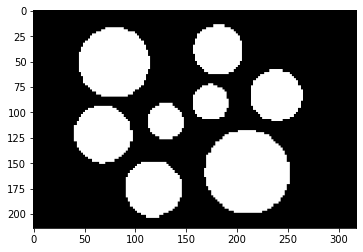

In [23]:
from scipy import ndimage
hole = ndimage.binary_fill_holes(thresh1).astype(int)
plt.imshow(hole, cmap = 'gray')
filename = "hole.png"
cv2.imwrite(filename, hole)

Text(0.5, 1.0, 'boundary')

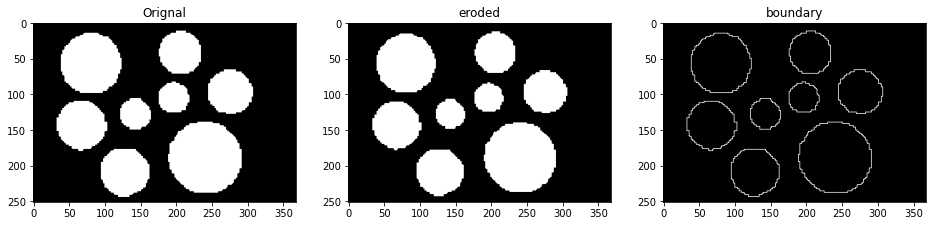

In [25]:
img = cv2.imread("result.png")
# img = img1
r,img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
img_erode = cv2.erode(img,kernel,iterations = 1)

boundary = img - img_erode

plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(img, cmap = "gray")
plt.title("Orignal")

plt.subplot(1,3,2)
plt.imshow(img_erode, cmap = "gray")
plt.title("eroded")

plt.subplot(1,3,3)
plt.imshow(boundary, cmap = "gray")
plt.title("boundary")

## Ans 3

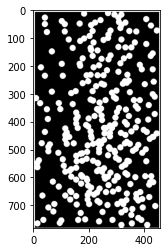

In [26]:
q2 = cv2.imread("Fig2.tif")
plt.imshow(q2,cmap = "gray")

Text(0.5, 1.0, 'Dilation of Erosion = opening')

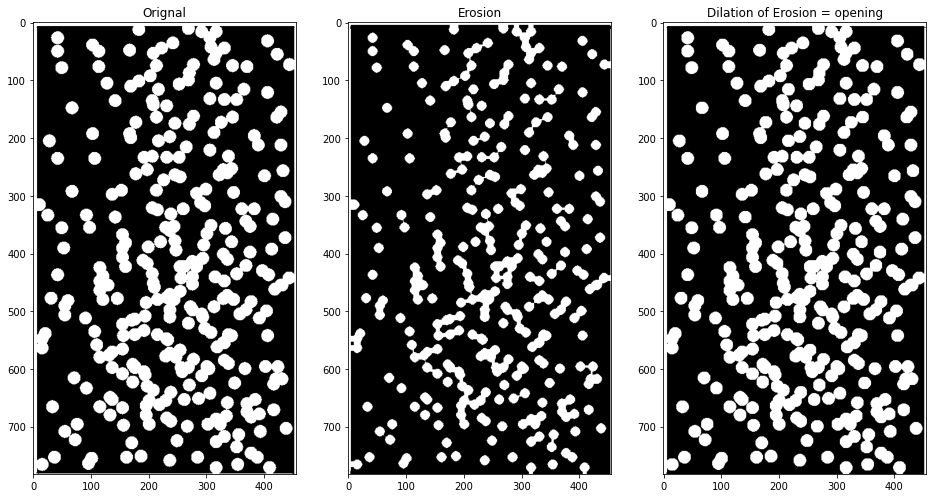

In [27]:
#by apllying opening operation
#opeing is erosion followed by Dilution

img = cv2.imread("Fig2.tif",0)
r,img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img,kernel,iterations = 1)

opening_img = cv2.dilate(img_erosion,kernel,iterations = 1)

plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(img, cmap = "gray")
plt.title("Orignal")

plt.subplot(1,3,2)
plt.imshow(img_erosion, cmap = "gray")
plt.title("Erosion")

plt.subplot(1,3,3)
plt.imshow(opening_img, cmap = "gray")
plt.title("Dilation of Erosion = opening")

Text(0.5, 1.0, 'Erosion of Dilation = Closing')

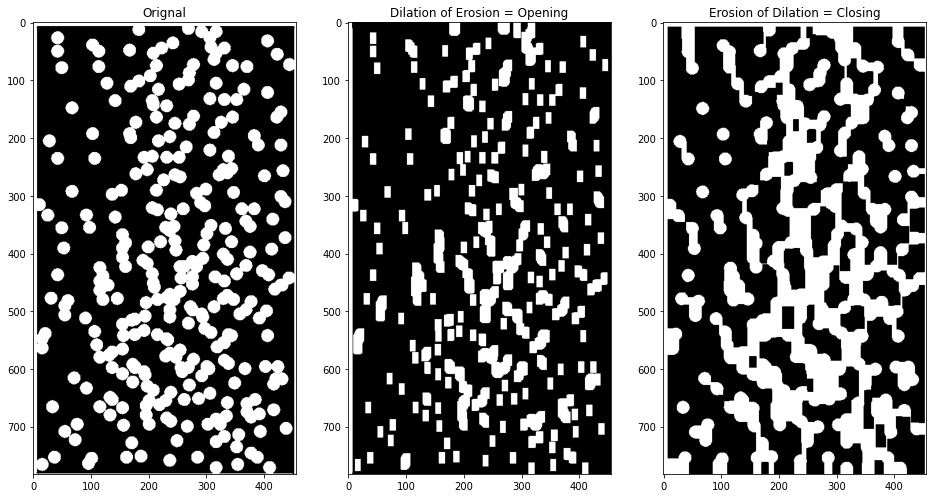

In [28]:
img = cv2.imread("Fig2.tif",0)
r,img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
kernel = np.ones((20,10), np.uint8)
img_dilate = cv2.dilate(img,kernel,iterations = 1)

closing_img = cv2.erode(img_dilate,kernel,iterations = 1)

img_erosion = cv2.erode(img,kernel,iterations = 1)

opening_img = cv2.dilate(img_erosion,kernel,iterations = 1)

plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(img, cmap = "gray")
plt.title("Orignal")

plt.subplot(1,3,2)
plt.imshow(opening_img, cmap = "gray")
plt.title("Dilation of Erosion = Opening")

plt.subplot(1,3,3)
plt.imshow(closing_img, cmap = "gray")
plt.title("Erosion of Dilation = Closing")

121


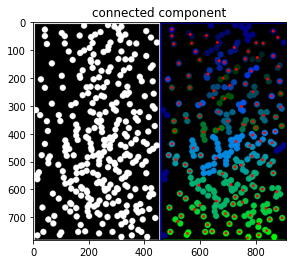

In [29]:
img = cv2.imread('Fig2.tif', cv2.IMREAD_GRAYSCALE)
otsu_thr, otsu_mask = cv2.threshold(img, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

connectivity = 8
output = cv2.connectedComponentsWithStats(otsu_mask, connectivity, cv2.CV_32S)

num_labels, labelmap, stats, centers = output

colored = np.full((img.shape[0], img.shape[1], 3), 0, np.uint8)

for l in range(1, num_labels):
    if stats[l][4] > 200:
        colored[labelmap == l] = (0, 255*l/num_labels, 255*num_labels/l)
        cv2.circle(colored, 
                   (int(centers[l][0]), int(centers[l][1])), 5, (255, 0, 0), cv2.FILLED)
        
img = cv2.cvtColor(otsu_mask*255, cv2.COLOR_GRAY2BGR)
plt.title("connected component")
plt.imshow(np.hstack((img, colored)))
print(num_labels-1)